In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv('customer_segmentation_kmeans.csv')

In [5]:
scaler = StandardScaler()
scaler_data = scaler.fit_transform(data)

In [6]:
wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(scaler_data)
    wcss.append(kmeans.inertia_)

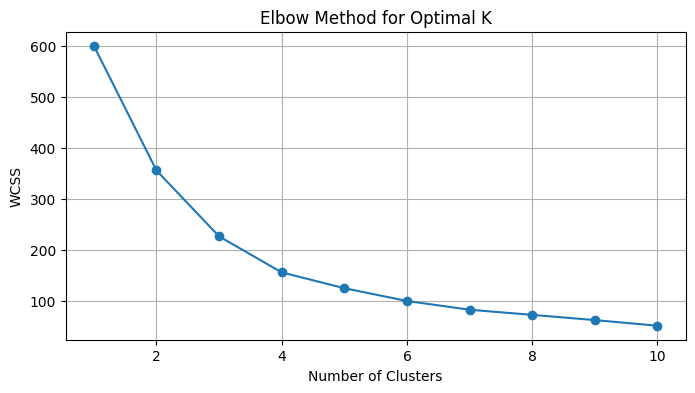

In [8]:
plt.figure(figsize=(8,4))
plt.plot(range(1,11),wcss,marker = 'o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [10]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(scaler_data)

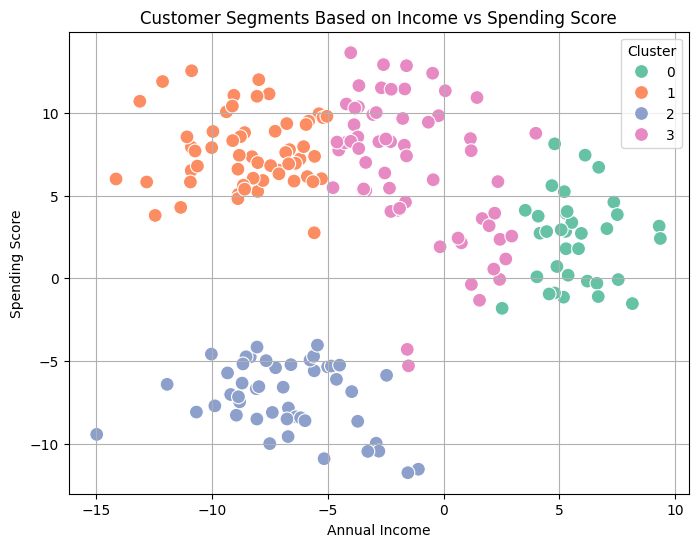

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Annual_Income', y='Spending_Score', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments Based on Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [ ]:
print("\n🧾 Sample Clustered Data:")
print(data.head(20))